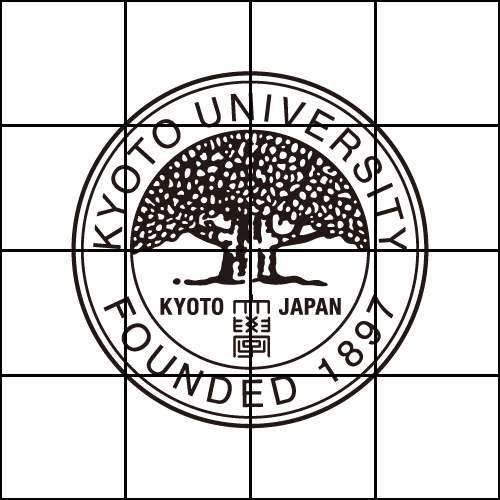

In [36]:
# このファイルに必要なものはコピーしておくことが必要。
from PIL import Image,ImageDraw

im = Image.open("./logo.png")
draw = ImageDraw.Draw(im)
w, h = im.size  # 500x 500のはず
for i in (list(range(0, 500, 125)) + [499]):  
                # range には + はできないので、list に一旦変換
    draw.line([i,0,i,500],fill="black",width=3)
    draw.line([0,i,500,i],fill="black",width=3)
im

(500, 500, 4)


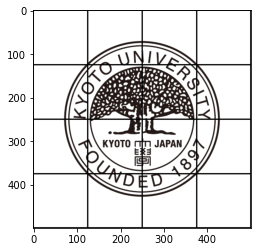

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray, aspect="equal")
plt.show()

In [38]:

# 第3成分だけをとってくる。
fst= imarray[:,:,3]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]

#その x　成分，y 成分の配列のペアとなる配列を作る
image = np.array([[x for (x,y) in original],
                  [y for (x,y) in original]])
image

array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [ 1.   ,  1.   ,  1.   , ..., -0.996, -0.996, -0.996]])

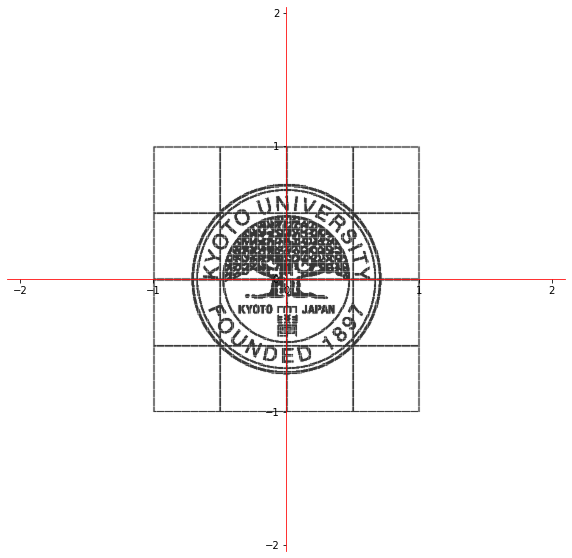

In [39]:
def showimage(image, size=0):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    if(size== 0):
        size = int(image.max())+1
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks(range(-size, size+1, 1))
    ax.set_yticks(range(-size, size+1, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

In [40]:
#練習問題10

def rotate(t):
    u = t * np.pi/180
    a = np.array([[np.cos(u),-np.sin(u)],
                  [np.sin(u),np.cos(u)]])
    return a
n = 0

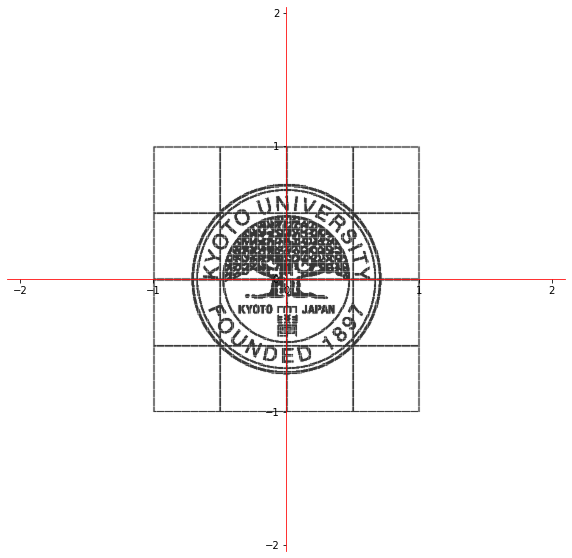

In [41]:
#ctrl + return で何度も実行できるようにした
showimage(rotate(n)@image)
n += 10

In [42]:
#練習問題20

def trans(a):
    showimage(a@image)
#    showimage(a@image)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    

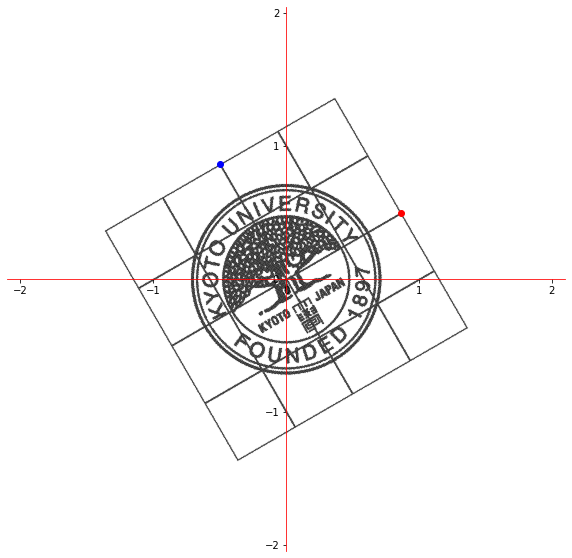

In [43]:
#練習問題30
trans(rotate(30))

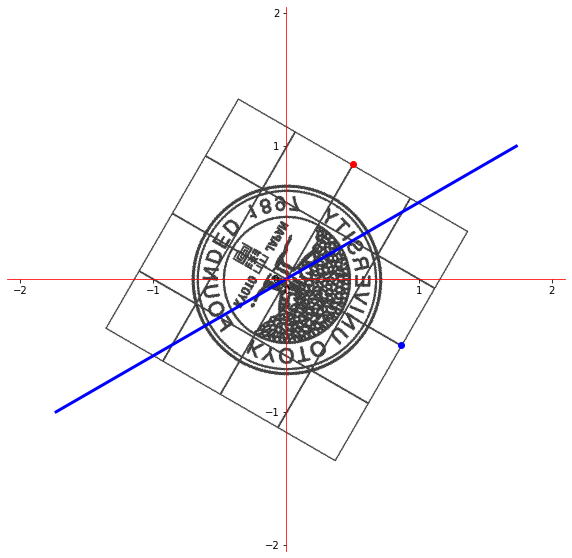

In [44]:
#練習問題35

def flip(t):
    a = np.array([[1,0],[0,-1]])
    b = rotate(t)@a@rotate(-t)
    return b

trans(flip(30))
u = 30 * np.pi/180
plt.plot([-2*np.cos(u),2*np.cos(u)],[-2*np.sin(u),2*np.sin(u)], 'b-', lw=3)   

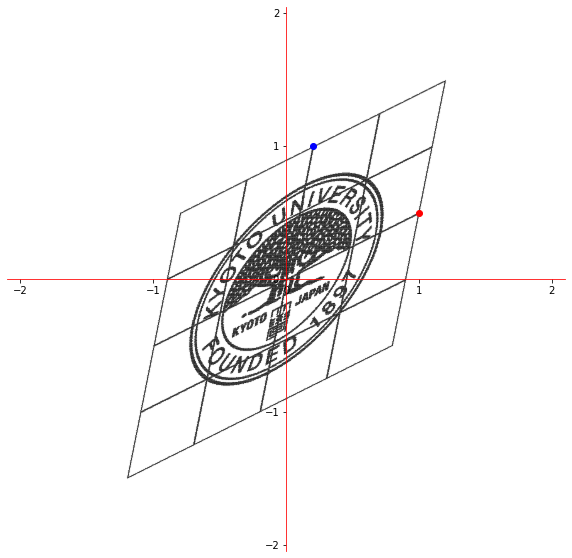

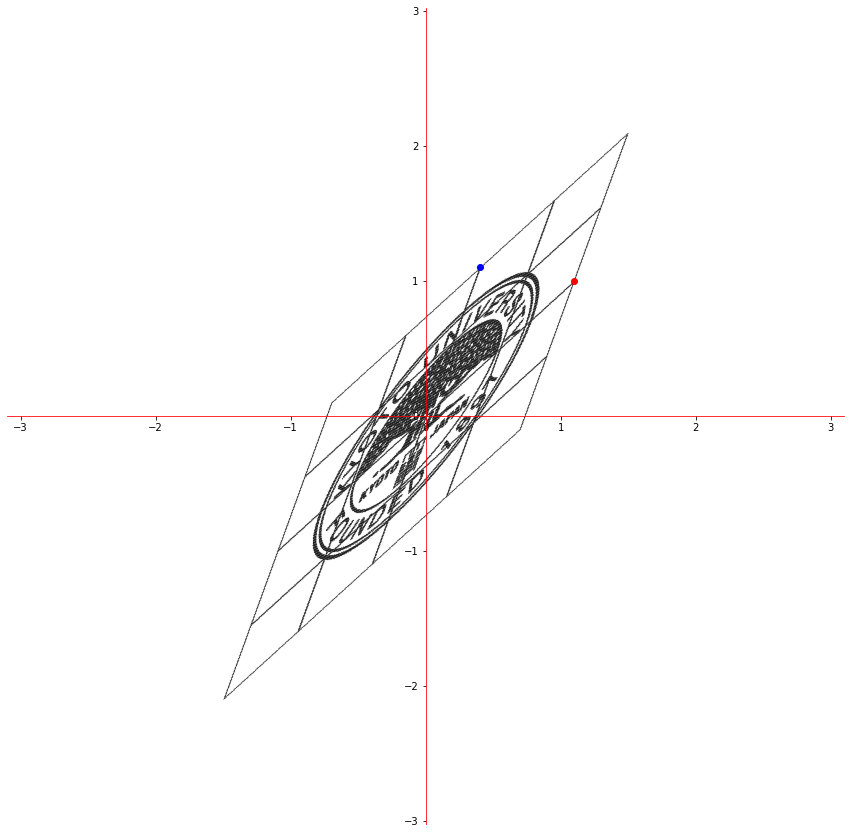

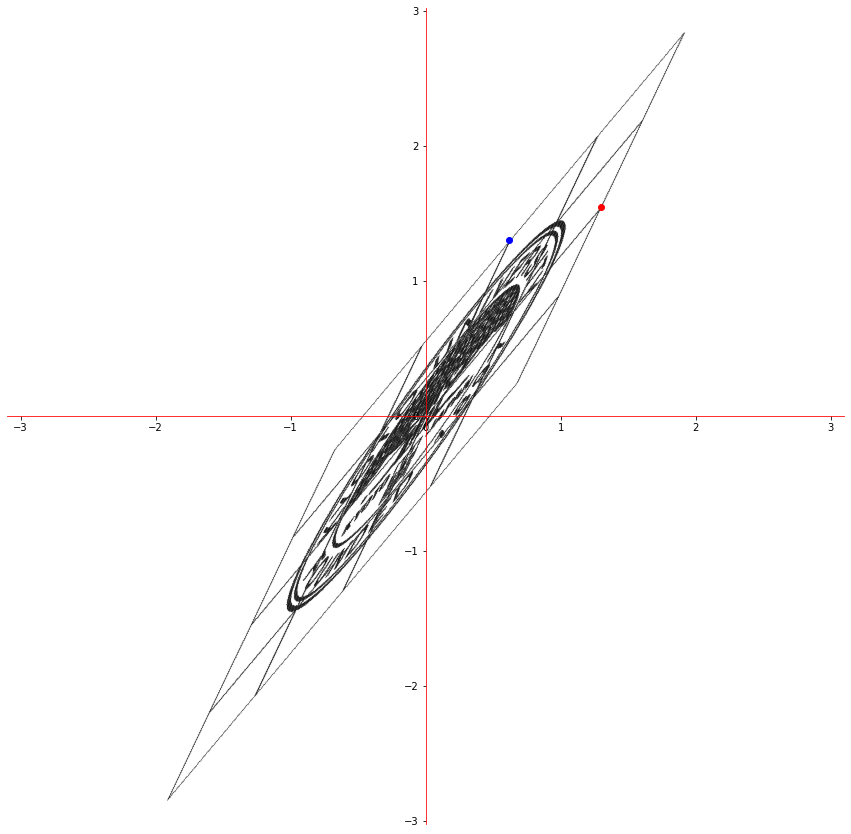

In [45]:
#練習問題40

a = np.array([[1,0.2],[0.5,1]])
trans(a)
trans(np.linalg.matrix_power(a, 2))
trans(np.linalg.matrix_power(a, 3))


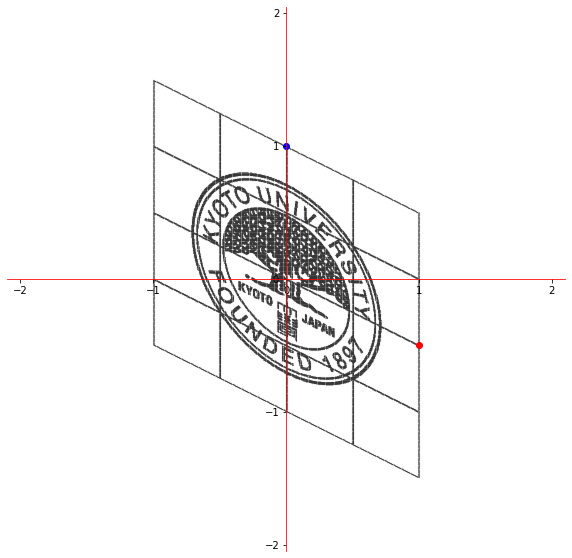

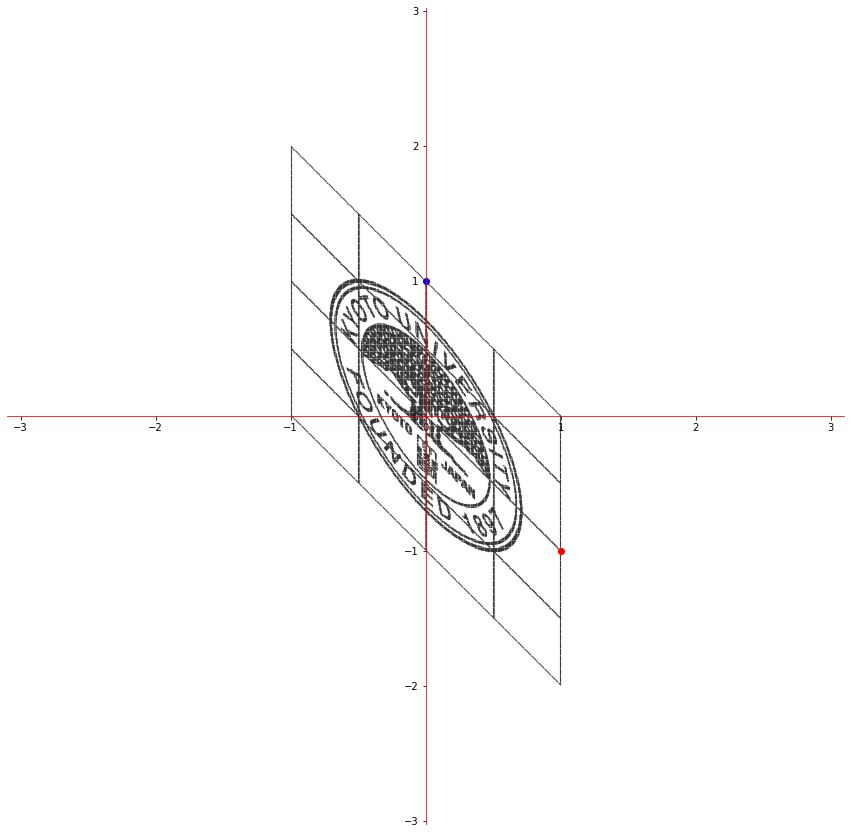

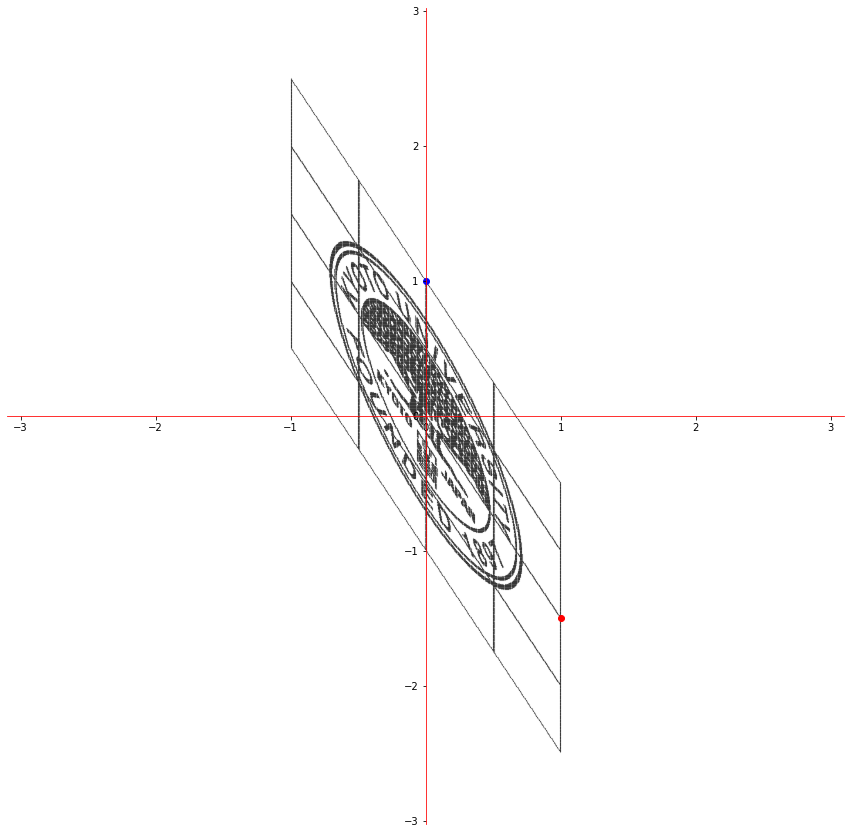

In [46]:
#練習問題50

a = np.array([[1,0],[-0.5,1]])
trans(a)
trans(np.linalg.matrix_power(a, 2))
trans(np.linalg.matrix_power(a, 3))

一つ目(v,w)=((0.8660254037844387+0.4999999999999999j),[(0.7071067811865476+0j), -0.7071067811865475j]
二つ目(v,w)=((0.8660254037844387-0.4999999999999999j),[(0.7071067811865476-0j), 0.7071067811865475j]


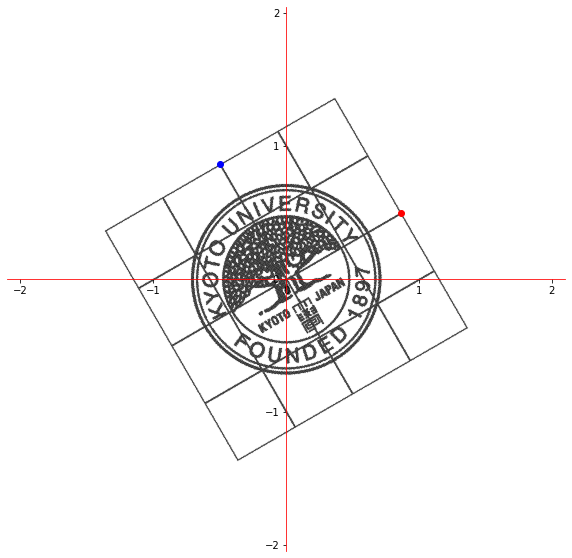

In [47]:
# 練習問題60-1

def eigen(a):
    showimage(a@image)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    v, w = np.linalg.eig(a)
    print(f"一つ目(v,w)=({v[0]},{[w[0][0],w[1][0]]}")
    print(f"二つ目(v,w)=({v[1]},{[w[0][1],w[1][1]]}")
    if(v[0].imag == 0.0):
        plt.plot([0,w[0][0]],[0,w[1][0]], 'b-', lw=3)    
        plt.plot([0,w[0][1]],[0,w[1][1]], 'r-', lw=3)     

eigen(rotate(30))

# 実数の範囲では存在しない。

一つ目(v,w)=(1.0,[0.8660254037844387, 0.4999999999999999]
二つ目(v,w)=(-1.0,[-0.4999999999999999, 0.8660254037844387]


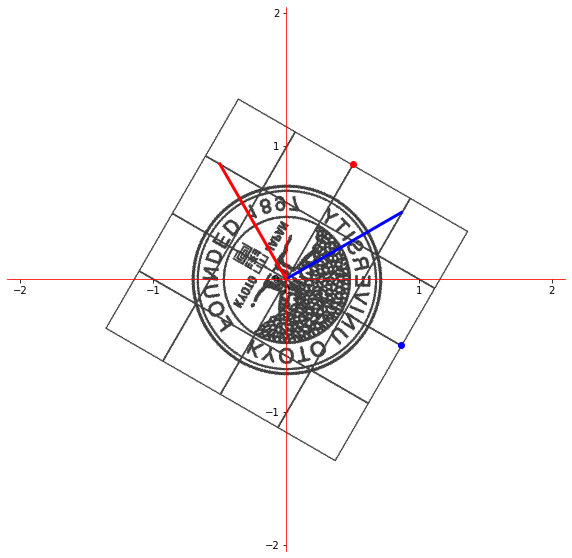

In [48]:
# 練習問題60-2
eigen(flip(30))

# 一つ目は 1, 二つ目は -1, それぞれ、折り返し面とその垂線

一つ目(v,w)=(1.316227766016838,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.683772233983162,[-0.5345224838248489, 0.8451542547285165]
一つ目(v,w)=(1.732455532033676,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.4675444679663242,[-0.5345224838248489, 0.8451542547285165]
一つ目(v,w)=(2.2803060746521977,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.3196939253478023,[-0.5345224838248489, 0.8451542547285166]


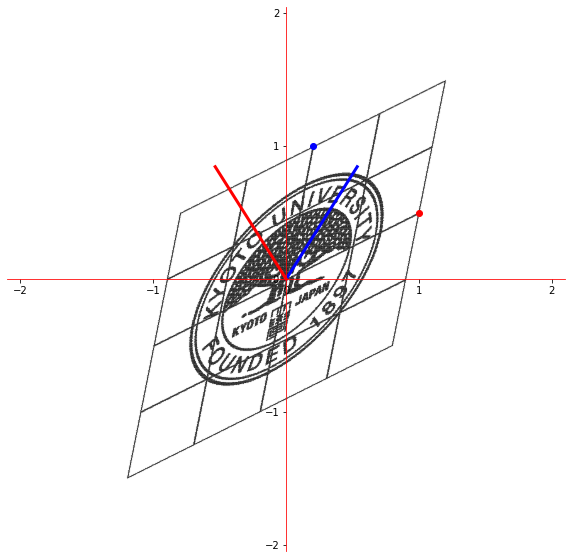

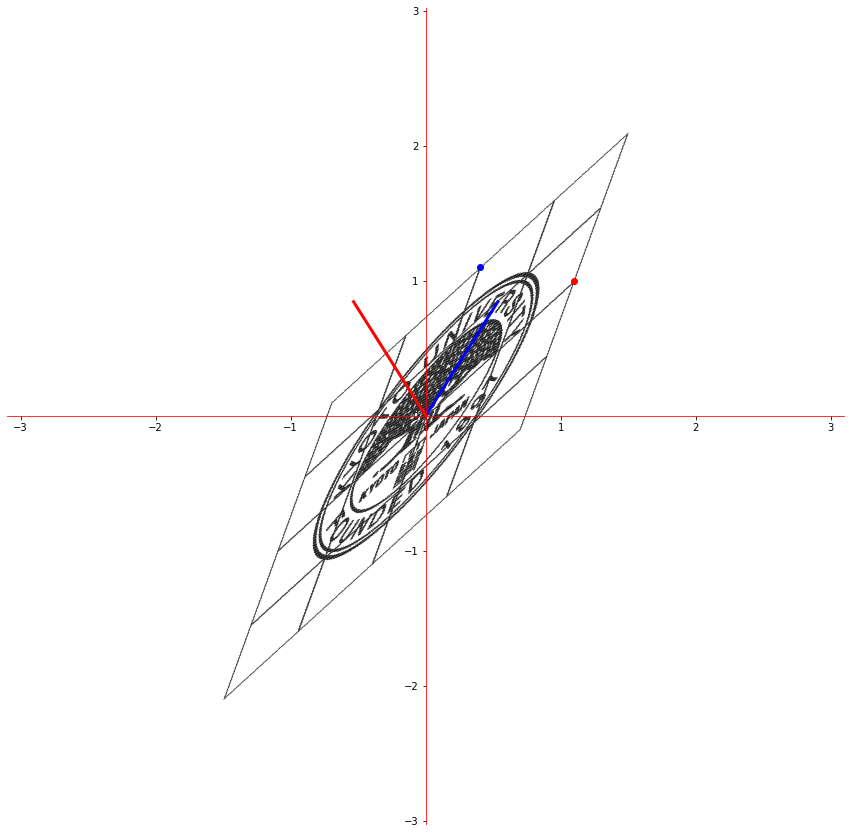

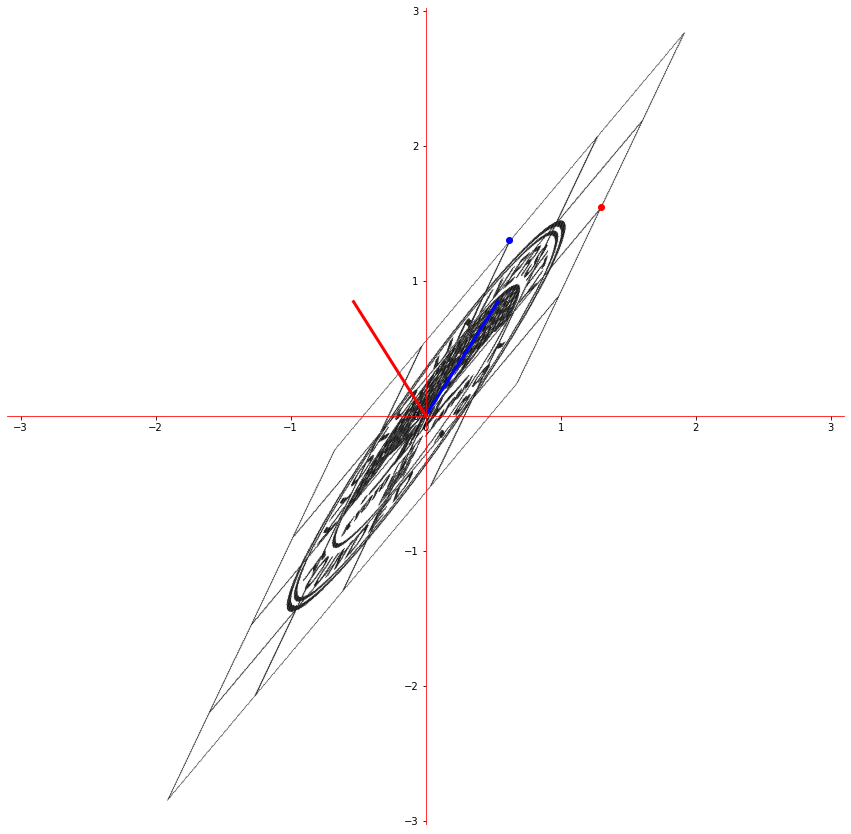

In [49]:
# 練習問題60-3
a = np.array([[1,0.2],[0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

# 片方の固有値の絶対値が1 より大きく、もう片方が 1 より小さいと、
# a を何度もかけると、a の固有値の大きい方の固有ベクトルの方に吸い寄せられていく。

一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[4.440892098500626e-16, 1.0]
一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[2.220446049250313e-16, 1.0]
一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[1.4802973661668753e-16, 1.0]


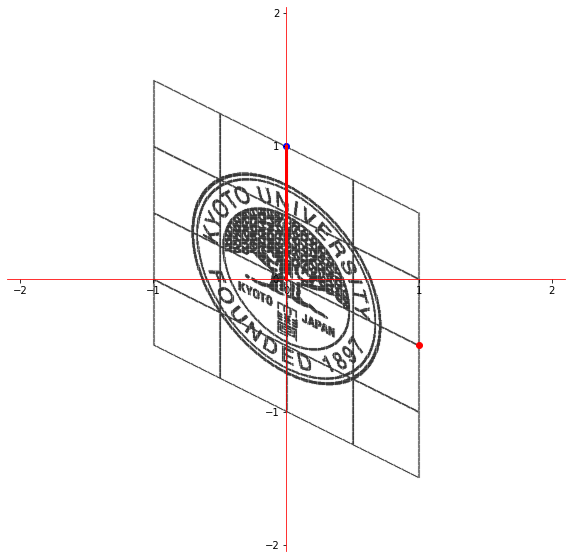

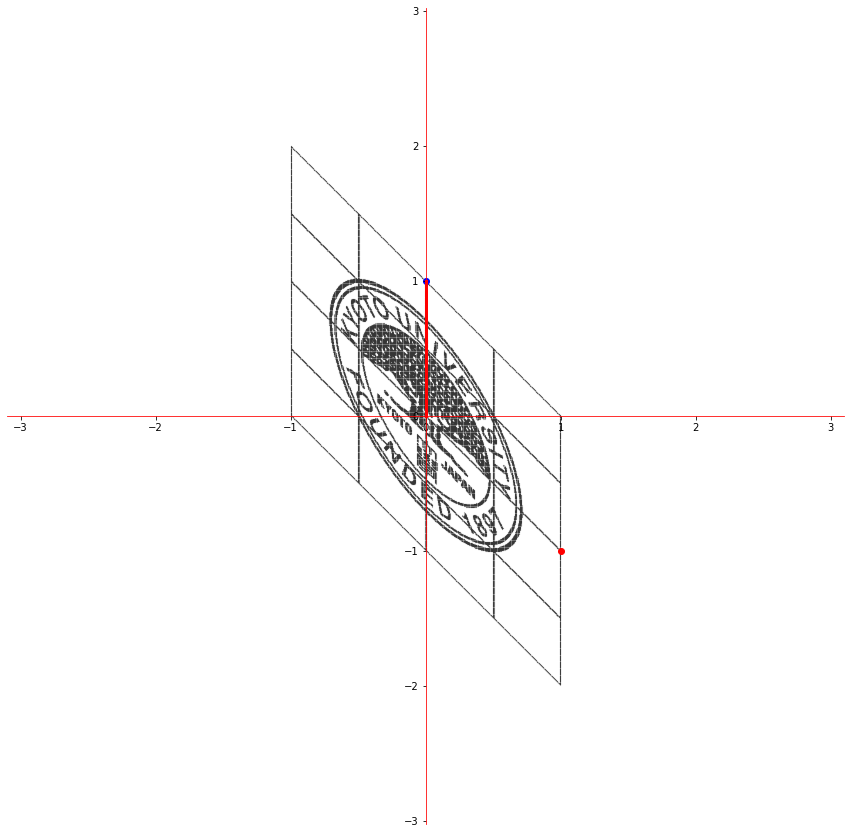

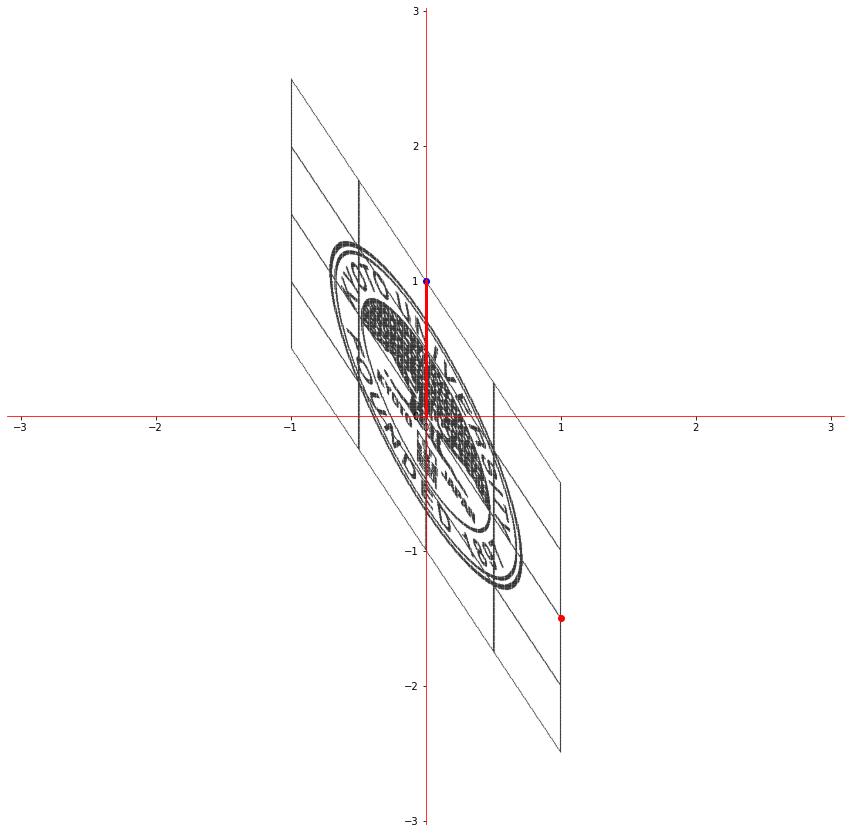

In [50]:
# 練習問題60-4
a = np.array([[1,0],[-0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

# 固有値は一つ。2つ目の固有ベクトルは、1つ目と同じ

TypeError: 'numpy.float64' object cannot be interpreted as an integer

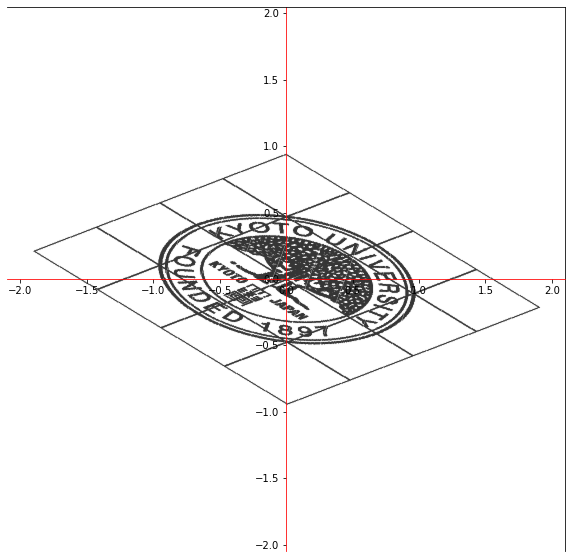

In [51]:
#練習問題 70
import math
def eigenrotate(a):
    
    v, w = np.linalg.eig(a)
    if(v[0] > v[1]):
        c = w[0][1]
        s = w[1][1]
    else:
        c = w[0][1]
        s = w[1][1]            
    b = -(np.array([[c, -s],[s,c]]))
#    showimage(a@image,a.max()+1) # 元画像
    showimage(b@a@image,a.max()+1)   
    
a = np.array([[1,0.2],[0.5,1]])
eigenrotate(a)
eigenrotate(a@a)
eigenrotate(a@a@a)

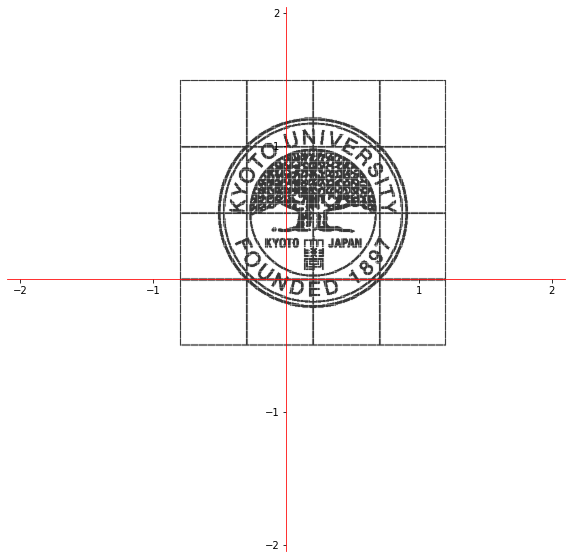

In [63]:
# 練習問題 80
def trans(xx,yy):
    return np.array([[1,0,xx],[0,1,yy]])

showimage(trans(0.2,0.5)@np.array([image[0],image[1],[1]*(imagex.shape[0])]))